# Predicting Car Prices

This project will use a k-nearest neighbors machine learning algorithm using both test/train and k-fold validation to predict a car's market price using its attributes. This dataset is available from the UC Irvine Machine Learning Repository via the following link: https://archive.ics.uci.edu/ml/datasets/automobile

## Part 1: Test/Train Validation

## Reading in the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

pd.options.display.max_columns = 99

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('imports-85.csv', names=cols)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
# To perform k-nearest neighbors machine learning techniques we select only columns with continuous values. 

continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]

numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning 

As we can see from the first few rows in the table above, some of the missing values are denoted by the character '?'. We will thus replace such values with a missing value instead and convert all columns into a numeric form. 

In [4]:
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars = numeric_cars.astype('float')

numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [5]:
# As we want to predict the price, we remove any rows with missing price values.

numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [6]:
numeric_cars.shape

(201, 15)

In [7]:
# For most columns with missing values these represent a very small percentage of the total values.
# 'Normalizaed-losses' does have the largest share of missing values out of its total values but this is still only 18%. 
# Thus, we replace missing values with column means. 

numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [8]:
# Normalize all columns so that values range between 0 and 1 except for the target price column. 

#price_col = numeric_cars['price']
#numeric_cars = (numeric_cars - numeric_cars.mean()) / (numeric_cars.std())
#numeric_cars['price'] = price_col

#numeric_cars.head(10)

In [9]:
# Normalize all columnns to range from 0 to 1 except the target column.

price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col
numeric_cars.head(10)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,17450.0
5,0.298429,0.384840,0.540299,0.512821,0.441667,0.395268,0.283019,0.464286,0.633333,0.09375,0.289720,0.551020,0.166667,0.236842,15250.0
6,0.486911,0.559767,0.770149,0.948718,0.658333,0.525989,0.283019,0.464286,0.633333,0.09375,0.289720,0.551020,0.166667,0.236842,17710.0
7,0.298429,0.559767,0.770149,0.948718,0.658333,0.568658,0.283019,0.464286,0.633333,0.09375,0.289720,0.551020,0.166667,0.236842,18920.0
8,0.486911,0.559767,0.770149,0.948718,0.675000,0.619860,0.264151,0.421429,0.633333,0.08125,0.429907,0.551020,0.111111,0.105263,23875.0
10,0.664921,0.425656,0.532836,0.384615,0.541667,0.351823,0.177358,0.685714,0.347619,0.11250,0.247664,0.673469,0.277778,0.342105,16430.0


## Univariate Model 

We start with a univariate model. This will accept only one training column in the function and will return the average RMSE value for each training column over the list of possible k-values given by: 1,3,5,7,9. 

In [10]:
def knn_train_test(train_col, target_col, df, k_values):
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(random_df) / 2)
    
    # Train model using first half of data set and test using the second half. 
    train_df = random_df.iloc[0:last_train_row]
    test_df = random_df.iloc[last_train_row:]
    

    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses


k_rmse_dict = {}
train_cols = numeric_cars.columns.drop('price')

# For each column except price, train a model, return RMSE value and add to the dictionary `rmse_dict`.
for c in train_cols:
    k_rmse_dict[c] = knn_train_test(c,'price',numeric_cars,[1,3,5,7,9])

# Dictionary is commented out to save space.
# k_rmse_dict


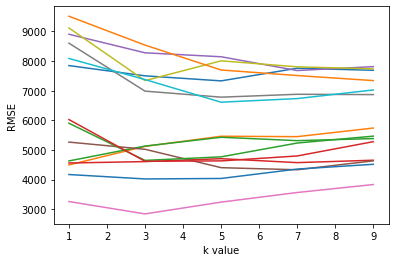

In [11]:
# A visualization of the results using a line graph. 

%matplotlib inline

for k,v in k_rmse_dict.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

In [12]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in k_rmse_dict.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

sorted_features = sorted_series_avg_rmse.index

engine-size          3346.484586
horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64


Therefore, on average over the different possible k-values used here (1,3,5,7,9), engine-size has the lowest RMSE while height has the highest RMSE. 

## Multivariate Model 

The multivariate model will allow for multiple training columns to be used to predict a car's market price. This will initially be for the fixed default value of k, (k = 5). This model is expanded later on to account for different possible k-values. 

In [13]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(random_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = random_df.iloc[0:last_train_row]
    test_df = random_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_dict = {}

# Calculate the RMSE for the best performing univariate columns in 'sorted_features' using the default k-value.
for nr_best_feats in range(2,7):
    k_rmse_dict['{} best features'.format(nr_best_feats)] = knn_train_test(sorted_features[:nr_best_feats],'price',numeric_cars)

k_rmse_dict

{'2 best features': {5: 2949.8817277180374},
 '3 best features': {5: 3580.7376651928435},
 '4 best features': {5: 3487.340917327035},
 '5 best features': {5: 3410.2170133901805},
 '6 best features': {5: 3478.510890118539}}

The best result is with two best features: engine-size and horsepower. 

## Hyperparameter Tuning

Using the best performing univariate models, i.e. columns with the lowest RMSEs, we find which k-value optimizes our model by running our model for each k-value from 1 - 25 for each combination of the best performing models.  

In [14]:
def knn_train_test(train_cols, target_col, df, k_values):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(random_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = random_df.iloc[0:last_train_row]
    test_df = random_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_dict = {}
 
for nr_best_feats in range(2,6):
    k_rmse_dict['{} best features'.format(nr_best_feats)] = knn_train_test(sorted_features[:nr_best_feats],'price',numeric_cars,range(1,25))

# Dictionary is commented out to save space.  
# k_rmse_dict

In [15]:
# Return the optimal model, i.e. model with lowest RMSE

min_rmses = []
min_rmse_k_value = [] 

for nr_features in k_rmse_dict:
    k = 1
    k_min = 1
    rmses = list(k_rmse_dict[nr_features].values())
    min_rmse = rmses[0]
    for rmse in rmses:
        if rmse < min_rmse:
            min_rmse = rmse
            k_min = k
        k = k + 1    
    
    min_rmses.append(min_rmse)
    min_rmse_k_value.append(k_min)


def optimum_model(min_rmses_list, corresponding_k_values_list):
    min_rmse_base = min_rmses_list[0]
    k = -1 
    k_value_index = 0
    min_rmse = min_rmses_list[0]
    
    for rmse in min_rmses_list:
        k = k + 1
        if rmse < min_rmse_base:
            min_rmse = rmse
            k_value_index = k
        
        
    return(min_rmse, corresponding_k_values_list[k_value_index], k_value_index)

  
minimum_rmse = optimum_model(min_rmses, min_rmse_k_value)[0] 
corresponding_k_value = optimum_model(min_rmses, min_rmse_k_value)[1] 
model_dict_index = optimum_model(min_rmses, min_rmse_k_value)[2] 

model_list = []
for i in k_rmse_dict:
    model_list.append(i)

model = model_list[model_dict_index]

print("The best model is:",str(model),"which has an RMSE of:",str(minimum_rmse),"and has a k-value of:",str(corresponding_k_value))

The best model is: 2 best features which has an RMSE of: 2657.7963807419765 and has a k-value of: 2


## Optimal k-value for each model

In [16]:
# The optimal k-value for each model is shown in the following table.

data = {'Model':  model_list,
        'Optimal k-value': min_rmse_k_value}

optimal_k_value_df = pd.DataFrame (data, columns = ['Model','Optimal k-value'])

optimal_k_value_df.head()

,Model,Optimal k-value
0,2 best features,2
1,3 best features,3
2,4 best features,1
3,5 best features,1


These results are also shown graphically below with the following line graph.

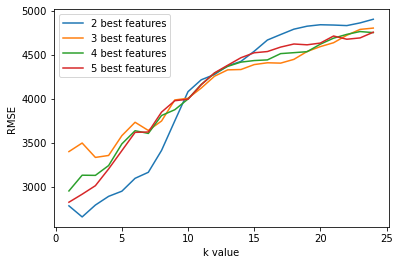

In [17]:
# Using a line plot we can observe the change in RMSE for change in k value for each combination of best features. 

for k,v in k_rmse_dict.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()

Therefore, the best model, at least defined by having the lowest RMSE and using test/train validation, is the 2 best features model with a k-value of 2. 

## Car Price Prediction

If we have data for cars where we know its features but not its price, we can use the following algorithm to predict its market price. The new data is represented by the "new_data" dataframe. As we do not have this data in this project, the code will not run here but can be used for future work.

This price prediction is based on a k-nearest neighbors algorithm with test/train validation. 

In [18]:
# knn = KNeighborsRegressor(n_neighbors=corresponding_k_value, algorithm='brute')
# index = model.split(' ')[0]
# index = int(index)

# train_cols = sorted_features[:index]

# knn.fit(numeric_cars[train_cols], numeric_cars['price'])
# predictions = knn.predict(new_data[features])


## Part 2: K-Fold Cross Validation

Holdout and k-fold cross validation are both more robust techniques to measure a model's accuracy than the test/train approach used above. Generally, k-fold cross validation is better as it gives your model the opportunity to train on multiple train-test splits rather than just one as is the case for holdout validation. However, the holdout method is good when using very large datasets or need fast results as it requires less time and computational power than k-fold validation. 

As our dataset is not very large we use k-fold cross validation as a more robust means to measure our model's accuracy. 


Choosing the right number of folds when performing k-fold cross validation is more of an art and less of a science. A k-fold value of 2 is really just holdout validation. On the other end, using n folds (the number of observations in the data set) is known as leave-one-out cross validation, or LOOCV for short. Via trial and error, data scientists have converged on 10 as the standard k-fold value.

We will calculate the standardized average RMSE and standardized STD of RMSE for each k value ranging between 1-9 and for each k fold between 2-24. The best model will be that which has the lowest combined score (we assume equal weighting to average RMSE and its standard deviation).

## Optimal k-value and number of folds

Finally, we expand on the previous work by calculating the optimal model with the optimal k-value and optimal number of k-folds.  

In [19]:
def knn_k_fold_k_values(train_cols, target_col, df, k_values, k_folds):
    rmses_dict = {}
    
    for k in k_values:
        for fold in k_folds:
            kf = KFold(fold, shuffle=True, random_state=1)
            model = KNeighborsRegressor(n_neighbors=k)
            mses = cross_val_score(model, df[train_cols], df[target_col], scoring="neg_mean_squared_error", cv=kf)
            rmses = np.sqrt(np.absolute(mses))
            avg_rmse = np.mean(rmses)
            std_rmse = np.std(rmses)
            key = str(k),",",str(fold)
            rmses_dict[key] = "k-value:", str(k), "number folds:", str(fold), "avg RMSE: ", str(avg_rmse), "std RMSE: ", str(std_rmse)
    
    return rmses_dict


model_full_rmse_dict = {}
 
for nr_best_feats in range(2,6):
    model_full_rmse_dict['{} best features'.format(nr_best_feats)] = knn_k_fold_k_values(sorted_features[:nr_best_feats],'price',numeric_cars,list(range(1,10)),list(range(2,25)))


# Dictionary is commented out to save space.
# model_full_rmse_dict

In [20]:
# To choose the optimal validation we add the normalizaed average RMSE and normalized standard deviation of RMSE together for every k-value and fold. 
# The k-value with the lowest score is optimal, assuming we value average RMSE and std of RMSE equally. 

min_sums_full = []
num_folds_values_full = []
k_values_full = []

for nr_features in model_full_rmse_dict:
    keys_list = list(model_full_rmse_dict[nr_features].keys())
    first_key = keys_list[0]
    
    list_avg_rmse = []
    list_std_rmse = []
    
    for i in list(model_full_rmse_dict[nr_features].values()):
        list_avg_rmse.append(float(i[5]))
        
    for i in list(model_full_rmse_dict[nr_features].values()):
        list_std_rmse.append(float(i[7]))
    
    max_avg_rmse = float(np.max(list_avg_rmse))
    max_std_rmse = float(np.max(list_std_rmse))
    
    min_avg_rmse = float(np.min(list_avg_rmse))
    min_std_rmse = float(np.min(list_std_rmse))

    min_sum_base = (float(model_full_rmse_dict[nr_features][first_key][5]) - min_avg_rmse)/(max_avg_rmse - min_avg_rmse) + (float(model_full_rmse_dict[nr_features][first_key][7]) - min_std_rmse)/(max_std_rmse - min_std_rmse)
    
    num_folds_base = float(model_full_rmse_dict[nr_features][first_key][3])
    k_value_base = float(model_full_rmse_dict[nr_features][first_key][1])
    
    for num_fold in model_full_rmse_dict[nr_features]:

        min_sum = (float(model_full_rmse_dict[nr_features][num_fold][5]) - min_avg_rmse)/(max_avg_rmse - min_avg_rmse) + (float(model_full_rmse_dict[nr_features][num_fold][7]) - min_std_rmse)/(max_std_rmse - min_std_rmse)
        
        num_folds = float(model_full_rmse_dict[nr_features][num_fold][3])
        k_value = float(model_full_rmse_dict[nr_features][num_fold][1])
    
        if min_sum < min_sum_base:
            min_sum_base = min_sum
            num_folds_base = num_folds
            k_value_base = k_value
        else:
            pass
    
    min_sums_full.append(min_sum_base)
    num_folds_values_full.append(num_folds_base)
    k_values_full.append(k_value_base)


print(min_sums_full)
print(num_folds_values_full)
print(k_values_full)

[0.4401386020049675, 0.32820671128353185, 0.35094793924281537, 0.36778949616071277]
[3.0, 3.0, 9.0, 5.0]
[5.0, 2.0, 1.0, 1.0]


## Optimal Number of Folds and K-Values for Each Model 

In [21]:
# The optimal number of folds for each model is shown in the following table.

data = {'Model':  model_list,
        'Optimal k-value': k_values_full,
        'Optimal number of k-folds': num_folds_values_full}

optimal_k_folds_df = pd.DataFrame (data, columns = ['Model','Optimal k-value','Optimal number of k-folds'])

optimal_k_folds_df.head()

,Model,Optimal k-value,Optimal number of k-folds
0,2 best features,5.0,3.0
1,3 best features,2.0,3.0
2,4 best features,1.0,9.0
3,5 best features,1.0,5.0


In [22]:
# Return the optimal model 

def optimum_model_k_and_fold(min_sum_list, num_folds_list, k_values_list):
    min_sum_base = min_sum_list[0]
    k = -1 
    index = 0
    
    for min_sum in min_sum_list:
        k = k + 1
        if min_sum < min_sum_base:
            min_sum_base = min_sum
            index = k
        else:
            pass
            
    return(min_sum_base, num_folds_list[index], k_values_list[index], index)

  
total_model_minimum_sum = optimum_model_k_and_fold(min_sums_full, num_folds_values_full, k_values_full)[0] 
total_model_number_k_folds = optimum_model_k_and_fold(min_sums_full, num_folds_values_full, k_values_full)[1] 
total_model_k_value = optimum_model_k_and_fold(min_sums_full, num_folds_values_full, k_values_full)[2] 
total_model_model_dict_index_2 = optimum_model_k_and_fold(min_sums_full, num_folds_values_full, k_values_full)[3] 

model_list = []
for i in k_rmse_dict:
    model_list.append(i)

model = model_list[total_model_model_dict_index_2]

print("The best model is:",str(model),"which has a minimum avg RMSE and std RMSE sum (in standardized figures) of:",str(total_model_minimum_sum),"which has a k-value of:",str(total_model_k_value), "and", str(total_model_number_k_folds),"k-folds used for k-fold cross validation.")


The best model is: 3 best features which has a minimum avg RMSE and std RMSE sum (in standardized figures) of: 0.32820671128353185 which has a k-value of: 2.0 and 3.0 k-folds used for k-fold cross validation.


## Conclusion

Test/train validation suggests that the best model to use is the 2 best features with a k-value of 2. 

K-fold cross validation (where k>1) suggests that we should use the 3 best features with a k-value of 2 and 3 folds.

Given that k-fold cross validation is a more robust model and our dataset is quite small, the latter solution is preferred. We can then use this model to predict car market prices when we only know its features. 